In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, LogisticRegression

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn import metrics

from sklearn import datasets

### Boston Housing Datasets

In [2]:
boston_dataset = datasets.load_boston()

In [7]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [3]:
# Define x / parameters / features and y / label / target
x = pd.DataFrame(boston_dataset['data'], columns=boston_dataset['feature_names'])
y = pd.DataFrame(boston_dataset['target'], columns=['price'])

# Split training data and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Initiate the model
model = LinearRegression()

# Training process
model.fit(x_train, y_train)

# Testing and evaluation process
y_pred = model.predict(x_test)
error = metrics.mean_absolute_error(y_test, y_pred)

print('MAE: {}'.format(error))

MAE: 3.7507121808389168


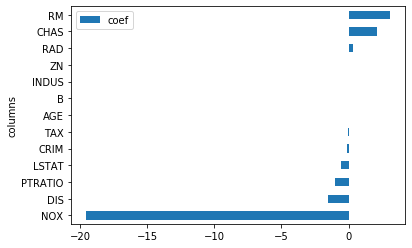

In [4]:
coefs = pd.DataFrame({'columns': list(x.columns),
                      'coef': list(model.coef_[0])}).sort_values('coef')

coefs.plot.barh(x='columns', y='coef')

## Encoding

### One Hot Encoding

In [7]:
university = pd.read_csv('http://bit.ly/dwp-data-university')

university = pd.get_dummies(university, columns=['Research'])

In [8]:
university

,GRE,TOEFL,GPA,University Class,Research_N,Research_Y
0,330,115,9.34,1,0,1
1,302,102,8.00,0,1,0
2,328,116,9.50,1,0,1
3,334,119,9.70,1,0,1
4,336,119,9.80,1,0,1
...,...,...,...,...,...,...
101,320,110,9.27,1,0,1
102,304,103,7.92,1,1,0
103,332,108,9.02,1,0,1
104,337,117,9.87,1,0,1


### Label Encoding

In [5]:
university = pd.read_csv('http://bit.ly/dwp-data-university')

# Buat kolom baru dengan rules, Y -> 1 , N -> 0

# 1. Define function
def convert_research(row):
    if row['Research'] == 'Y':
        return 1
    return 0

# 2. Apply function
university['Research'] = university.apply(convert_research, axis=1)

In [6]:
university

,GRE,TOEFL,GPA,Research,University Class
0,330,115,9.34,1,1
1,302,102,8.00,0,0
2,328,116,9.50,1,1
3,334,119,9.70,1,1
4,336,119,9.80,1,1
...,...,...,...,...,...
101,320,110,9.27,1,1
102,304,103,7.92,0,1
103,332,108,9.02,1,1
104,337,117,9.87,1,1


### Normalization / Standardization

In [67]:
# Normalization --> merubah range data sehingga memiliki nilai 0 - 1
# Standardization --> merubah range data sehingga memiliki mean = 0, dan std = 1

In [12]:
university = pd.read_csv('http://bit.ly/dwp-data-university')

university = pd.get_dummies(university, columns=['Research'])

# Define parameters and labels
x = university[['GRE', 'TOEFL', 'GPA']]
y = university['University Class']

# Split the data into training data and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Scale the data
scaler = StandardScaler()
x_train_after = scaler.fit_transform(x_train)

## Supervised Learning

In [15]:
university = pd.read_csv('http://bit.ly/dwp-data-university')

def convert_research(row):
    if row['Research'] == 'Y':
        return 1
    return 0

university['Research'] = university.apply(convert_research, axis=1)

In [16]:
university.head()

,GRE,TOEFL,GPA,Research,University Class
0,330,115,9.34,1,1
1,302,102,8.00,0,0
2,328,116,9.50,1,1
3,334,119,9.70,1,1
4,336,119,9.80,1,1


### Logistic Regression

In [17]:
# Define parameters and labels
x = university[['GRE', 'TOEFL', 'GPA', 'Research']]
y = university['University Class']

In [18]:
# Split the data into training data and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [19]:
# Scale the data
# Yang perlu diingat:
# - Scaling dilakukan setelah split data dan sebelum training
# - Scaling x_train dan x_test dipisah

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [20]:
# Initiate the model
model = LogisticRegression()

In [21]:
# Training process
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [108]:
# Testing and evaluation process
y_pred = model.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy Score: {}'.format(accuracy))

Accuracy Score: 0.8636363636363636


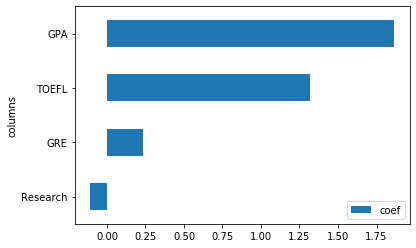

In [22]:
coefs = pd.DataFrame({'columns': list(x.columns),
                      'coef': list(model.coef_[0])}).sort_values('coef')

coefs.plot.barh(x='columns', y='coef')

f(x1b1 + x2b2 + x3b3 + x4b4 + b0)

In [140]:
import math

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [139]:
(0.55013376*model.coef_[0][0]) + (0.8347188*model.coef_[0][1]) + (0.48095854*model.coef_[0][2]) + (0.47140452*model.coef_[0][3]) + model.intercept_

array([3.58234624])

In [141]:
sigmoid(3.58234624)

0.9729421179192783

In [137]:
x.columns

Index(['GRE', 'TOEFL', 'GPA', 'Research'], dtype='object')

In [112]:
model.intercept_

array([1.51227748])

In [144]:
model.predict_proba(x_test)

array([[0.02705788, 0.97294212],
       [0.04370904, 0.95629096],
       [0.96374655, 0.03625345],
       [0.03097918, 0.96902082],
       [0.10764339, 0.89235661],
       [0.04291142, 0.95708858],
       [0.02157358, 0.97842642],
       [0.00721126, 0.99278874],
       [0.00999071, 0.99000929],
       [0.04834136, 0.95165864],
       [0.6869026 , 0.3130974 ],
       [0.09734778, 0.90265222],
       [0.40965632, 0.59034368],
       [0.00260617, 0.99739383],
       [0.60813775, 0.39186225],
       [0.04504733, 0.95495267],
       [0.0253039 , 0.9746961 ],
       [0.95912311, 0.04087689],
       [0.9984637 , 0.0015363 ],
       [0.98908052, 0.01091948],
       [0.19140379, 0.80859621],
       [0.02705623, 0.97294377]])